# DMT-Assignment01-Task01-Preprocess

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
plt.style.use("ggplot")

In [2]:
# read data from file
dataset = pd.read_csv("dataset_mood_smartphone.csv")
dataset

,Unnamed: 0,id,time,variable,value
0,1,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,2,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,3,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,4,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,5,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...,...
376907,2770399,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,2772465,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,2774026,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,2774133,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [3]:
# Because "Unnamed" seems useless, get rid of it from dataset
dataset = dataset.drop("Unnamed: 0", 1)
dataset

,id,time,variable,value
0,AS14.01,2014-02-26 13:00:00.000,mood,6.000
1,AS14.01,2014-02-26 15:00:00.000,mood,6.000
2,AS14.01,2014-02-26 18:00:00.000,mood,6.000
3,AS14.01,2014-02-26 21:00:00.000,mood,7.000
4,AS14.01,2014-02-27 09:00:00.000,mood,6.000
...,...,...,...,...
376907,AS14.30,2014-04-11 07:51:16.948,appCat.weather,8.032
376908,AS14.30,2014-04-19 11:00:32.747,appCat.weather,3.008
376909,AS14.30,2014-04-26 10:19:07.434,appCat.weather,7.026
376910,AS14.30,2014-04-27 00:44:48.450,appCat.weather,23.033


In [4]:
# make time lables
dataset.loc[:,"time"] = pd.to_datetime(dataset.time)
dataset.loc[:,"time"]

0        2014-02-26 13:00:00.000
1        2014-02-26 15:00:00.000
2        2014-02-26 18:00:00.000
3        2014-02-26 21:00:00.000
4        2014-02-27 09:00:00.000
                   ...          
376907   2014-04-11 07:51:16.948
376908   2014-04-19 11:00:32.747
376909   2014-04-26 10:19:07.434
376910   2014-04-27 00:44:48.450
376911   2014-04-07 18:25:14.036
Name: time, Length: 376912, dtype: datetime64[ns]

<AxesSubplot:title={'center':'Hist. of Features'}>

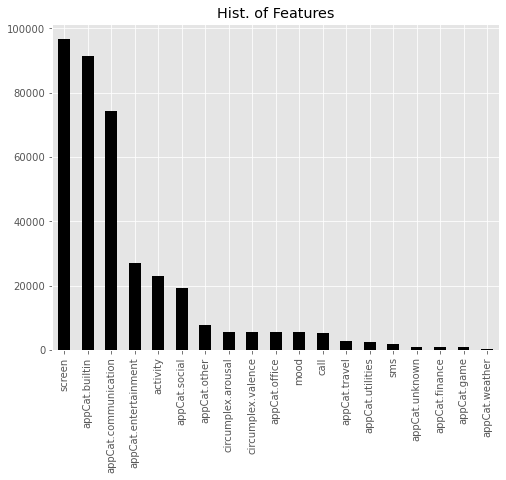

In [19]:
# visualize dataset
pd.DataFrame(dataset.variable.value_counts()).plot(kind='bar', title="Hist. of Features", \
                                                       legend=None, figsize=(8,6))